Growing Degree Days (GDD) is a key and widely used concept in agriculture for predicting plant growth stages. In simple terms, GDD measures heat accumulation by calculating the average temperature of a day minus a base temperature, typically the lowest temperature at which a specific crop can grow. This metric is based on the principle that plant growth and development mostly occurs within a specific temperature range. In more advanced computations, researchers typically adopt a set of minimum, optimal, and maximum temperatures for different crop stages. The concept of GDD helps farmers, agronomists, and researchers better predict growth stages, like flowering, by using a "thermal time" instead of relying on calendar days.

For instance, in corn, a base temperature of 10°C is often used, so if the average daily temperature is 15°C, then 5 GDDs are accumulated for that day. Thermal time has units of C-d (or Cd).

In this exercise we will implement non-vectorized and vectorized versions of two common methods to compute GDD and then we will use it with a real weather dataset.

**Method 1** only considers $T_{base}$. This the most widely used method. It assumes a linear and unrestricted accumulation of heat units when $T_{avg} > T_{base}$

**Method 2** considers $T_{base}$, $T_{opt}$, and $T_{upper}$. This method is more realistic, but it requires specifying three cardinal temperatures. Maximum accumulation of heat units is when $T_{avg} = T_{opt}$. When $T_{avg}$ is below or above $T_{opt}$, the number of heat units accumulated is adjusted linearly.

**Vectorization** refers to the practice of applying operations to entire arrays or sequences of data at once, rather than using explicit loops. This is achieved through NumPy's powerful array objects and functions, which are designed to operate on arrays efficiently. When a function is vectorized, it can perform element-wise operations on arrays, leading to significantly faster execution and cleaner code.


In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Define cardinal temperatures for corn
T_base = 10
T_opt = 28
T_upper = 38


In [3]:
# Load some weather data
df = pd.read_csv('../datasets/gypsum_2018_daily.csv', parse_dates=['TIMESTAMP'])

# Display a few rows to inspect dataframe
df.head()


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,2018-01-01,Gypsum,99.44,100.03,98.73,104.44,-15.15,-19.56,-11.00,-15.31,...,-1.18,-2.45,-1.33,-1.14,0.74,3.50,0.1377,0.1167,0.2665,0.2203
1,2018-01-02,Gypsum,99.79,100.14,99.40,104.88,-16.48,-22.10,-10.40,-16.38,...,-1.56,-3.46,-2.10,-1.82,0.28,3.13,0.1234,0.1021,0.2642,0.2196
2,2018-01-03,Gypsum,98.87,99.52,97.94,103.81,-11.03,-20.64,-2.71,-10.66,...,-1.49,-3.61,-2.21,-1.93,-0.08,2.76,0.1206,0.0965,0.2353,0.2189
3,2018-01-04,Gypsum,98.22,98.54,97.90,102.99,-5.83,-11.79,0.24,-5.01,...,-0.98,-2.67,-1.60,-1.46,-0.21,2.45,0.1235,0.0973,0.2094,0.2182
4,2018-01-05,Gypsum,98.10,98.42,97.75,102.88,-4.73,-14.22,5.36,-4.23,...,-0.72,-2.81,-1.54,-1.38,-0.25,2.25,0.1249,0.0976,0.2047,0.2180


In [4]:
# Find number of missing values
df['TEMP2MAVG'].isna().sum()


1

In [5]:
# Replace missing values using linear method
df['TEMP2MAVG'].interpolate(method='linear', inplace=True)

# Check that missing values were replaced
df['TEMP2MAVG'].isna().sum()


0

In [6]:
# Select data for growing season
planting_date = pd.to_datetime('2018-04-01')
harvest_date = pd.to_datetime("2018-08-15")


In [7]:
# Select growing season weather
idx_season = (df['TIMESTAMP'] >= planting_date) & (df['TIMESTAMP'] <= harvest_date)
df_season = df[idx_season].reset_index(drop=True)
print('Growing season length:', df_season.shape[0], 'days')


Growing season length: 137 days


In [14]:
# Dsiplay Dataframe for the growing season
df_season.head(3)


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,2018-04-01,Gypsum,97.48,98.18,96.76,101.93,8.70,0.45,14.76,8.40,...,12.36,9.14,10.60,10.36,9.98,9.26,0.1731,0.1696,0.2572,0.2146
1,2018-04-02,Gypsum,97.94,98.23,97.46,102.62,-2.30,-4.05,1.00,-2.48,...,9.14,5.58,6.83,7.17,8.68,9.41,0.1690,0.1653,0.2545,0.2148
2,2018-04-03,Gypsum,96.42,97.55,95.47,101.01,1.34,-3.65,10.27,1.20,...,7.77,4.77,6.00,6.15,7.03,8.58,0.1687,0.1626,0.2517,0.2136


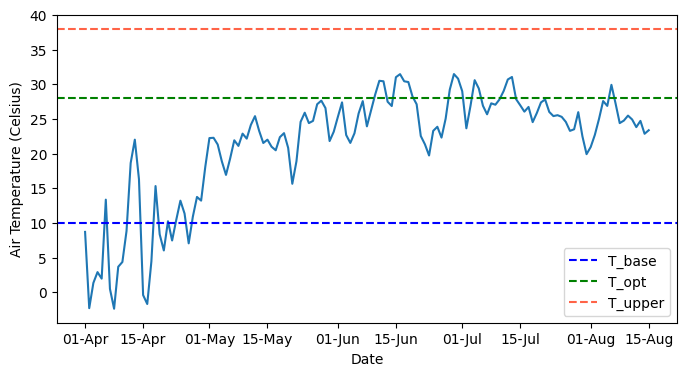

In [8]:
# Insoect temperature data
plt.figure(figsize=(8,4))
plt.plot(df_season['TIMESTAMP'], df_season['TEMP2MAVG'])
plt.axhline(T_base, linestyle='--', color='blue', label='T_base')
plt.axhline(T_opt, linestyle='--', color='green', label='T_opt')
plt.axhline(T_upper, linestyle='--', color='tomato', label='T_upper')
plt.xlabel('Date')
plt.ylabel('Air Temperature (Celsius)')
plt.legend()
fmt = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_formatter(fmt)
plt.show()


## Example using non-vectorized functions

The following functions can only accept one value of `T_avg` at the time. Which means that to compute multiple values in an array we would need to implement a loop. The advantage of this method is its simplicity and clarity.


In [9]:
# Method 1: T_base only
def gdd_method_1(T_avg,T_base,dt=1):
    if T_avg < T_base:
        GDD = 0
    else:
        GDD = (T_avg - T_base)*dt

    return GDD


In [10]:
# Method 2: T_base, T_opt, and T_upper (Linear)
def gdd_method_2(T_avg,T_base,T_opt,T_upper,dt=1):
    if T_avg <= T_base:
        GDD = 0

    elif T_base < T_avg < T_opt:
        GDD = (T_avg - T_base)*dt

    elif T_opt <= T_avg < T_upper:
        GDD = (T_upper - T_avg)/(T_upper - T_opt)*(T_opt - T_base)*dt

    else:
        GDD = 0
    
    return GDD


In [13]:
# Test that functions are working as expected
T_avg = 25

print(gdd_method_1(T_avg, T_base))
print(gdd_method_2(T_avg, T_base, T_opt, T_upper))


15
15


In [16]:
# Compute growing degree days

# Create empty arrays to append function values
GDD_1 = []
GDD_2 = []

# Iterate over each row
for k,row in df_season.iterrows():
    GDD_1.append(gdd_method_1(row['TEMP2MAVG'],T_base))
    GDD_2.append(gdd_method_2(row['TEMP2MAVG'],T_base, T_opt, T_upper)) 
    
# Add arrays as new dataframe columns
df_season['GDD_1'] = GDD_1
df_season['GDD_2'] = GDD_2

df_season['GDD_1_cum'] = df_season['GDD_1'].cumsum()
df_season['GDD_2_cum'] = df_season['GDD_2'].cumsum()

# Display resulting dataframe (new columns are at the end)
df_season.head(3)


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM,GDD_1,GDD_2,GDD_1_cum,GDD_2_cum
0,2018-04-01,Gypsum,97.48,98.18,96.76,101.93,8.70,0.45,14.76,8.40,...,9.98,9.26,0.1731,0.1696,0.2572,0.2146,0.0,0.0,0.0,0.0
1,2018-04-02,Gypsum,97.94,98.23,97.46,102.62,-2.30,-4.05,1.00,-2.48,...,8.68,9.41,0.1690,0.1653,0.2545,0.2148,0.0,0.0,0.0,0.0
2,2018-04-03,Gypsum,96.42,97.55,95.47,101.01,1.34,-3.65,10.27,1.20,...,7.03,8.58,0.1687,0.1626,0.2517,0.2136,0.0,0.0,0.0,0.0


In [18]:
diff_methods = np.round(df_season['GDD_1_cum'].iloc[-1] - df_season['GDD_2_cum'].iloc[-1])
print('The difference between methods is',diff_methods, 'degree-days')


The difference between methods is 106.0 degree-days


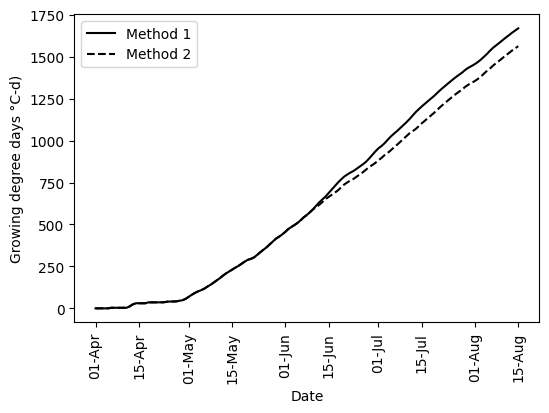

In [19]:
# Create figure
plt.figure(figsize=(6,4))

plt.plot(df_season['TIMESTAMP'], df_season['GDD_1'].cumsum(), '-k', label='Method 1')
plt.plot(df_season['TIMESTAMP'], df_season['GDD_2'].cumsum(), '--k', label='Method 2')
plt.xlabel('Date')
plt.xticks(rotation=90)
#plt.ylabel(u'Growing degree days (\N{DEGREE SIGN}C-d)')
plt.ylabel(f'Growing degree days {chr(176)}C-d)')
plt.legend()
fmt = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_formatter(fmt)

plt.show()


## Example using vectorized functions


In [45]:
def gdd_method_1_vect(T_avg, T_base, dt=1):
    """Vectorized function for computing GDD using method 1"""
    
    # Pre-allocate the GDD array with NaNs
    GDD = np.full_like(T_avg, np.nan)
    
    # Case 1: T_avg <= T_base
    condition_1 = T_avg <= T_base
    GDD[condition_1] = 0

    # Case 2: T_avg > T_base
    condition_2 = T_avg > T_base
    GDD[condition_2] = (T_avg[condition_2] - T_base)*dt

    return GDD


In [46]:
def gdd_method_2_vect(T_avg, T_base, T_opt, T_upper, dt=1):
    """Vectorized function for computing GDD using method 2"""
    
    # Pre-allocate the GDD array with NaNs
    GDD = np.full_like(T_avg, np.nan)

    # Case 1: T_avg <= T_base
    condition_1 =  T_avg <= T_base
    GDD[condition_1] = 0
    
    # Case 2: T_base < T_avg <= T_opt
    condition_2 = (T_avg > T_base) & (T_avg <= T_opt)
    GDD[condition_2] = (T_avg[condition_2] - T_base) * dt

    # Case 3: T_opt < T_avg <= T_upper
    condition_3 = (T_avg > T_opt) & (T_avg <= T_upper)
    GDD[condition_3] = ((T_upper-T_avg[condition_3]) / (T_upper-T_opt) * (T_opt-T_base)) * dt

    # Case 4: T_avg > T_upper
    condition_4 =  T_avg > T_upper
    GDD[condition_4] = 0
    
    return GDD


In [47]:
# Test that functions are working as expected
T_avg = np.array([0,12,20,30,40])

print(gdd_method_1_vect(T_avg, T_base))
print(gdd_method_2_vect(T_avg, T_base, T_opt, T_upper))


[ 0  2 10 20 30]
[ 0  2 10 14  0]


In [48]:
# Compute GDD
df_season['GDD_1_vect'] = gdd_method_1_vect(df_season['TEMP2MAVG'], T_base)
df_season['GDD_2_vect'] = gdd_method_2_vect(df_season['TEMP2MAVG'], T_base, T_opt, T_upper)

df_season['GDD_1_vect_cum'] = df_season['GDD_1'].cumsum()
df_season['GDD_2_vect_cum'] = df_season['GDD_2'].cumsum()

# Display resulting dataframe (new columns are at the end)
df_season.head(3)


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,VWC20CM,VWC50CM,GDD_1,GDD_2,GDD_1_cum,GDD_2_cum,GDD_1_vect,GDD_2_vect,GDD_1_vect_cum,GDD_2_vect_cum
0,2018-04-01,Gypsum,97.48,98.18,96.76,101.93,8.70,0.45,14.76,8.40,...,0.2572,0.2146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-02,Gypsum,97.94,98.23,97.46,102.62,-2.30,-4.05,1.00,-2.48,...,0.2545,0.2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-03,Gypsum,96.42,97.55,95.47,101.01,1.34,-3.65,10.27,1.20,...,0.2517,0.2136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


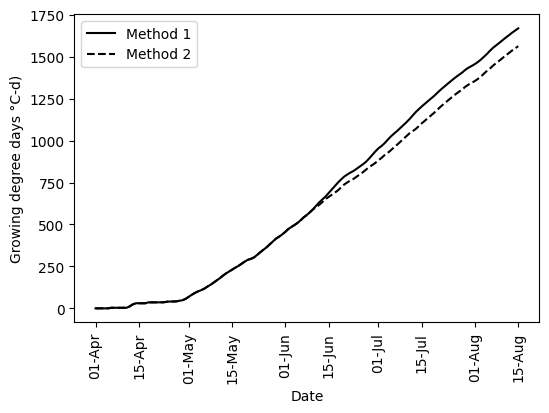

In [49]:
# Create figure using vectorized columns
plt.figure(figsize=(6,4))

plt.plot(df_season['TIMESTAMP'], df_season['GDD_1_vect_cum'], '-k', label='Method 1')
plt.plot(df_season['TIMESTAMP'], df_season['GDD_2_vect_cum'], '--k', label='Method 2')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel(f'Growing degree days {chr(176)}C-d)')
plt.legend()
fmt = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_formatter(fmt)

plt.show()


## Practice

- Search in the provided references or other articles in the literature for alternative methods to compute growing degree days and implement them in Python.

- Merge the code for different methods into a single function. Add an input named `method=` that will allow you to specify which computation method you want to use.

- Convert the non-vectorized functions into vectorized versions using the Numpy function `np.vectorize()`. This option is a convenient way of vectorizing functions, but it's not intended for efficiency. Then, compute the time it takes to compute GDD with each function implementation (non-vectorized, vectorized using Numpy booleans, and vectorized using `np.vectorize()`. Which is one is faster? Which one is faster to code? Hint: For timing the functions use the `perf_counter()` method the time module.


## References

McMaster, G.S. and Wilhelm, W., 1997. Growing degree-days: one equation, two interpretations. Agricultural and Forest Meteorology 87 (1997) 291-300

Nielsen, D. C., & Hinkle, S. E. (1996). Field evaluation of basal crop coefficients for corn based on growing degree days, growth stage, or time. Transactions of the ASAE, 39(1), 97-103.

Zhou, G. and Wang, Q., 2018. A new nonlinear method for calculating growing degree days. Scientific reports, 8(1), pp.1-14.